In [ ]:
!pip install -q hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 9.9 MB/s eta 0:00:00


In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 74.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import plot_roc_curve


from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [ ]:
data = pd.read_csv("/content/lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12409 entries, 0 to 12408
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             12409 non-null  float64
 1   term                  12409 non-null  object 
 2   int_rate              12409 non-null  float64
 3   installment           12409 non-null  float64
 4   grade                 12409 non-null  object 
 5   sub_grade             12409 non-null  object 
 6   emp_title             11705 non-null  object 
 7   emp_length            11843 non-null  object 
 8   home_ownership        12409 non-null  object 
 9   annual_inc            12409 non-null  float64
 10  verification_status   12409 non-null  object 
 11  issue_d               12409 non-null  object 
 12  loan_status           12409 non-null  object 
 13  purpose               12409 non-null  object 
 14  title                 12355 non-null  object 
 15  dti                

In [ ]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,12409.00,12409.00,12409.00,12409.00,12408.00,12408.00,12408.00,12408.00,12401.00,12408.00,11287.00,12393.00
mean,14159.25,13.65,433.51,74161.27,17.34,11.31,0.18,15850.16,53.51,25.39,1.80,0.12
std,8336.86,4.48,249.15,52452.57,8.31,5.13,0.51,19032.97,24.43,11.84,2.14,0.35
min,900.00,5.32,21.62,2500.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.59,256.23,45000.00,11.25,8.00,0.00,5972.00,35.40,17.00,0.00,0.00
50%,12000.00,13.33,379.33,64000.00,16.77,11.00,0.00,11142.50,54.60,24.00,1.00,0.00
75%,20000.00,16.49,568.64,90000.00,22.88,14.00,0.00,19718.75,72.80,32.00,3.00,0.00
max,40000.00,28.99,1533.81,2500000.00,189.90,49.00,9.00,382666.00,113.00,105.00,34.00,5.00


<ipython-input-14-bce5f2829710>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='viridis')


<Axes: >

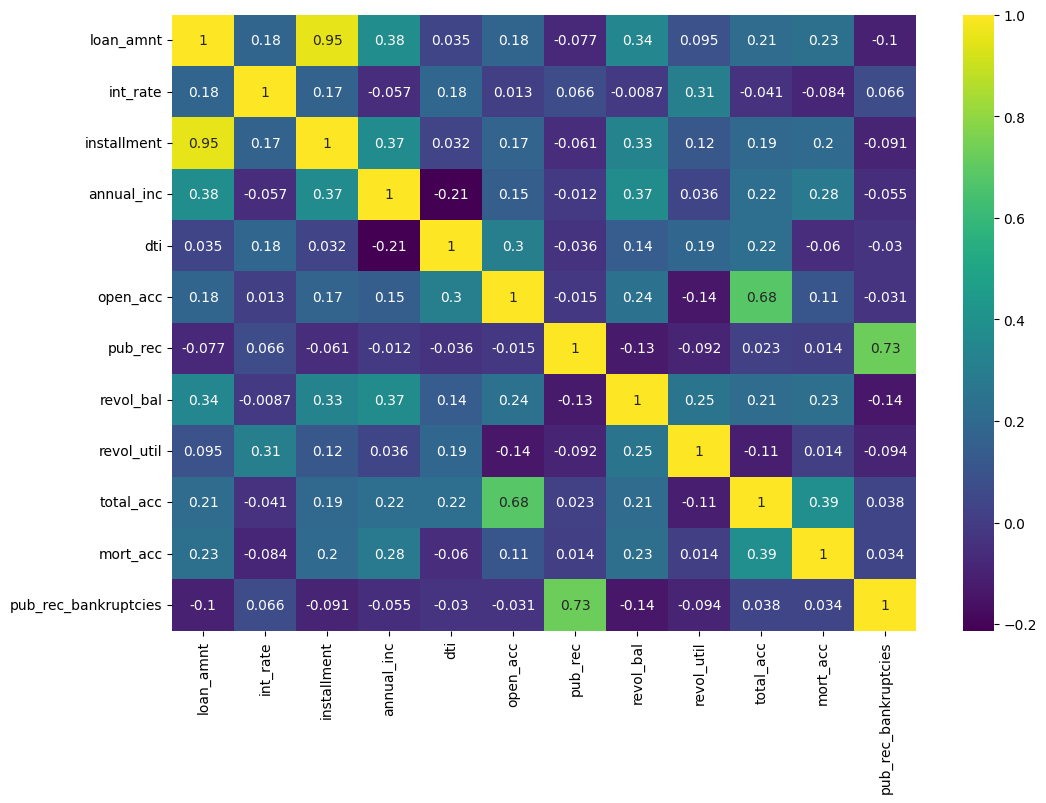

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [ ]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,8871.00,15096.47,8534.55,1000.00,8400.00,14000.00,20000.00,40000.00
Fully Paid,36629.00,13860.23,8310.03,500.00,7500.00,12000.00,19200.00,40000.00


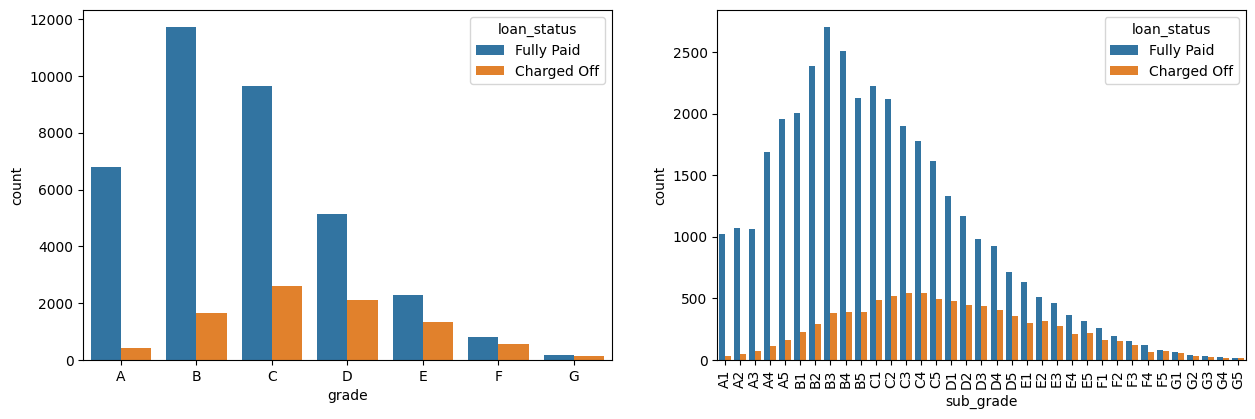

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);


In [ ]:
print((data[data.annual_inc >= 250000].shape[0] / data.shape[0]) * 100)
print((data[data.annual_inc >= 1000000].shape[0] / data.shape[0]) * 100)
data.loc[data.annual_inc >= 1000000, 'loan_status'].value_counts()
data.loc[data.annual_inc >= 250000, 'loan_status'].value_counts()

1.076899408804202
0.019779785059669017


Fully Paid     425
Charged Off     65
Name: loan_status, dtype: int64

In [ ]:
print(f"The Length of the data: {data.shape}")

The Length of the data: (45501, 27)


In [ ]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '2600' ==> '5.714%'
'emp_length': number of missing values '2080' ==> '4.571%'
'annual_inc': number of missing values '1' ==> '0.002%'
'verification_status': number of missing values '1' ==> '0.002%'
'issue_d': number of missing values '1' ==> '0.002%'
'loan_status': number of missing values '1' ==> '0.002%'
'purpose': number of missing values '1' ==> '0.002%'
'title': number of missing values '181' ==> '0.398%'
'dti': number of missing values '1' ==> '0.002%'
'earliest_cr_line': number of missing values '1' ==> '0.002%'
'open_acc': number of missing values '1' ==> '0.002%'
'pub_rec': number of missing values '1' ==> '0.002%'
'revol_bal': number of missing values '1' ==> '0.002%'
'revol_util': number of missing values '29' ==> '0.064%'
'total_acc': number of missing values '1' ==> '0.002%'
'initial_list_status': number of missing values '1' ==> '0.002%'
'application_type': number of missing values '1' ==> '0.002%'
'mort_acc': number of missing valu

In [ ]:
data.emp_title.nunique()
data.drop('emp_title', axis=1, inplace=True)

In [ ]:
data.emp_length.unique()
for year in data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')
data.drop('emp_length', axis=1, inplace=True)

10+ years years in this position:
Fully Paid    0.82
Charged Off   0.18
Name: loan_status, dtype: float64
4 years years in this position:
Fully Paid    0.81
Charged Off   0.19
Name: loan_status, dtype: float64
< 1 year years in this position:
Fully Paid    0.80
Charged Off   0.20
Name: loan_status, dtype: float64
6 years years in this position:
Fully Paid    0.81
Charged Off   0.19
Name: loan_status, dtype: float64
9 years years in this position:
Fully Paid    0.80
Charged Off   0.20
Name: loan_status, dtype: float64
2 years years in this position:
Fully Paid    0.80
Charged Off   0.20
Name: loan_status, dtype: float64
3 years years in this position:
Fully Paid    0.80
Charged Off   0.20
Name: loan_status, dtype: float64
8 years years in this position:
Fully Paid    0.82
Charged Off   0.18
Name: loan_status, dtype: float64
7 years years in this position:
Fully Paid    0.81
Charged Off   0.19
Name: loan_status, dtype: float64
5 years years in this position:
Fully Paid    0.81
Charged Of

In [ ]:
data.title.value_counts().head()

Debt consolidation         17598
Credit card refinancing     6007
Home improvement            1789
Other                       1505
Debt Consolidation          1313
Name: title, dtype: int64

In [ ]:
data.purpose.value_counts().head()

debt_consolidation    26921
credit_card            9673
home_improvement       2799
other                  2386
major_purchase         1022
Name: purpose, dtype: int64

In [ ]:
data.drop('title', axis=1, inplace=True)

In [ ]:
data.mort_acc.value_counts()

0.00     16093
1.00      6967
2.00      5836
3.00      4284
4.00      3225
5.00      2041
6.00      1335
7.00       699
8.00       367
9.00       185
10.00      106
11.00       46
12.00       31
14.00       14
13.00        8
15.00        7
16.00        4
19.00        2
22.00        1
34.00        1
25.00        1
17.00        1
32.00        1
Name: mort_acc, dtype: int64

In [ ]:
data.mort_acc.isna().sum()

4246

In [ ]:
data.corr()['mort_acc'].drop('mort_acc').sort_values().hvplot.barh()

<ipython-input-23-ef36d7282300>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['mort_acc'].drop('mort_acc').sort_values().hvplot.barh()


:Bars   [index]   (mort_acc)

In [ ]:
total_acc_avg = data.groupby(by='total_acc').mean().mort_acc

<ipython-input-24-584fae57b31c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = data.groupby(by='total_acc').mean().mort_acc


In [ ]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [ ]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

KeyError: ignored

In [ ]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'annual_inc': number of missing values '1' ==> '0.002%'
'verification_status': number of missing values '1' ==> '0.002%'
'issue_d': number of missing values '1' ==> '0.002%'
'loan_status': number of missing values '1' ==> '0.002%'
'purpose': number of missing values '1' ==> '0.002%'
'dti': number of missing values '1' ==> '0.002%'
'earliest_cr_line': number of missing values '1' ==> '0.002%'
'open_acc': number of missing values '1' ==> '0.002%'
'pub_rec': number of missing values '1' ==> '0.002%'
'revol_bal': number of missing values '1' ==> '0.002%'
'revol_util': number of missing values '29' ==> '0.064%'
'total_acc': number of missing values '1' ==> '0.002%'
'initial_list_status': number of missing values '1' ==> '0.002%'
'application_type': number of missing values '1' ==> '0.002%'
'mort_acc': number of missing values '4246' ==> '9.332%'
'pub_rec_bankruptcies': number of missing values '58' ==> '0.127%'
'address': number of missing values '1' ==> '0.002%'


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(41231, 24)

In [ ]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


In [ ]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [ ]:
data.term.unique()

array([36, 60])

In [ ]:
data.drop('grade', axis=1, inplace=True)

In [ ]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status',
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [ ]:
data.address.head()


0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [ ]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [ ]:
data.zip_code.value_counts()

22690    5990
70466    5956
30723    5841
48052    5702
00813    4802
29597    4719
05113    4708
93700    1242
86630    1142
11650    1129
Name: zip_code, dtype: int64

In [ ]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)


In [ ]:
data.drop('address', axis=1, inplace=True)

In [ ]:
data.drop('issue_d', axis=1, inplace=True)

In [ ]:
data.earliest_cr_line.nunique()

588

In [ ]:
data.drop('earliest_cr_line', axis=1, inplace=True)

In [ ]:
print(f"Data shape: {data.shape}")

# # Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# # Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(f"Data shape: {data.shape}")

Data shape: (41231, 79)
Data shape: (41231, 79)


In [ ]:
data['loan_status'] = data.loan_status.map({'Fully Paid':1, 'Charged Off':0})

In [ ]:
train, test = train_test_split(data, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

(27624, 79)
(13607, 79)


In [ ]:
print(train[train['dti'] <= 50].shape)
print(train.shape)

(27620, 79)
(27624, 79)


In [ ]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)
(264796, 79)

(27624, 79)
(27314, 79)


(264796, 79)

In [ ]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [ ]:
X_train.dtypes

loan_amnt         object
term              object
int_rate          object
installment       object
annual_inc        object
                   ...  
zip_code_30723    object
zip_code_48052    object
zip_code_70466    object
zip_code_86630    object
zip_code_93700    object
Length: 78, dtype: object

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
values = imp.fit([[1, 2], [np.nan, 3], [7, 6]])

In [ ]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [ ]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(999, inplace=True)

In [ ]:
# param_grid = dict(
#     n_estimators=stats.randint(10, 500),
#     max_depth=stats.randint(1, 10),
#     learning_rate=stats.uniform(0, 1)
# )

xgb_clf = XGBClassifier(use_label_encoder=False)
# xgb_cv = RandomizedSearchCV(
#     xgb_clf, param_grid, cv=3, n_iter=60,
#     scoring='roc_auc', n_jobs=-1, verbose=1
# )
# xgb_cv.fit(X_train, y_train)

# best_params = xgb_cv.best_params_
# best_params['tree_method'] = 'gpu_hist'
# # best_params = {'n_estimators': 50, 'tree_method': 'gpu_hist'}
# print(f"Best Parameters: {best_params}")

# xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 93.32%
_______________________________________________
CLASSIFICATION REPORT:
                0        1  accuracy  macro avg  weighted avg
precision    0.98     0.93      0.93       0.95          0.94
recall       0.67     1.00      0.93       0.84          0.93
f1-score     0.80     0.96      0.93       0.88          0.93
support   5407.00 21907.00      0.93   27314.00      27314.00
_______________________________________________
Confusion Matrix: 
 [[ 3648  1759]
 [   66 21841]]

Test Result:
Accuracy Score: 87.72%
_______________________________________________
CLASSIFICATION REPORT:
              0.0      1.0  accuracy  macro avg  weighted avg
precision    0.85     0.88      0.88       0.86          0.87
recall       0.49     0.98      0.88       0.73          0.88
f1-score     0.62     0.93      0.88       0.77          0.86
support   2781.00 10826.00      0.88   13607.00      13607.00
_______________________________________________
Confusion Matrix:

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

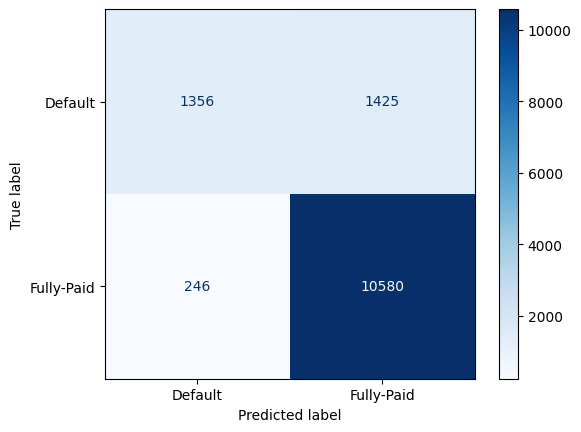

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Default', 'Fully-Paid']
)

In [ ]:
# param_grid = dict(
#     n_estimators=stats.randint(100, 1500),
#     max_depth=stats.randint(10, 100),
#     min_samples_split=stats.randint(1, 10),
#     min_samples_leaf=stats.randint(1, 10),
# )

rf_clf = RandomForestClassifier(n_estimators=100)
# rf_cv = RandomizedSearchCV(
#     rf_clf, param_grid, cv=3, n_iter=60,
#     scoring='roc_auc', n_jobs=-1, verbose=1
# )
# rf_cv.fit(X_train, y_train)
# best_params = rf_cv.best_params_
# print(f"Best Parameters: {best_params}")
# rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0        1  accuracy  macro avg  weighted avg
precision    1.00     1.00      1.00       1.00          1.00
recall       1.00     1.00      1.00       1.00          1.00
f1-score     1.00     1.00      1.00       1.00          1.00
support   5407.00 21907.00      1.00   27314.00      27314.00
_______________________________________________
Confusion Matrix: 
 [[ 5407     0]
 [    0 21907]]

Test Result:
Accuracy Score: 88.20%
_______________________________________________
CLASSIFICATION REPORT:
              0.0      1.0  accuracy  macro avg  weighted avg
precision    0.96     0.87      0.88       0.92          0.89
recall       0.44     1.00      0.88       0.72          0.88
f1-score     0.60     0.93      0.88       0.77          0.86
support   2781.00 10826.00      0.88   13607.00      13607.00
_______________________________________________
Confusion Matrix

NameError: ignored

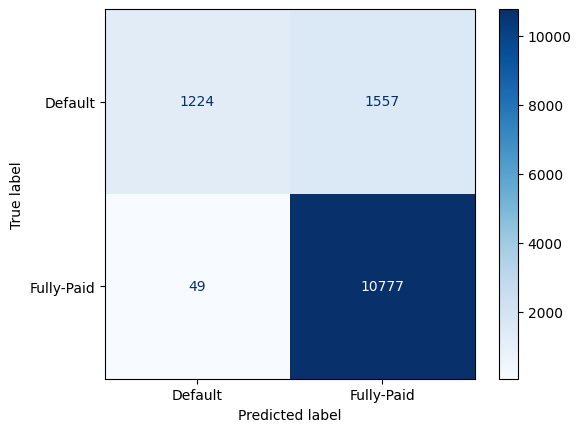

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test,
                             cmap='Blues', values_format='d',
                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)

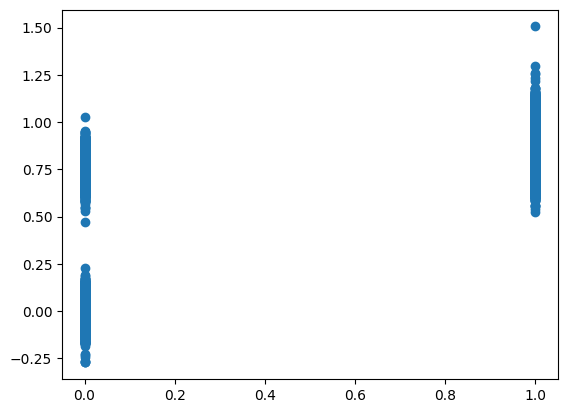

In [ ]:
plt.scatter(y_test, predictions)

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming your data has some features and a target variable, and 'loan_status' is the target variable
# X_train: Your training data features as a NumPy array
# y_train: Your training data target variable
# X_test: Your test data features as a NumPy array
# y_test: Your test data target variable

# Create a DataFrame for the training data
train_data = pd.DataFrame(data=X_train)
train_data['loan_status'] = y_train

# Create a DataFrame for the test data
test_data = pd.DataFrame(data=X_test)
test_data['loan_status'] = y_test

# Map the target variable to two clusters: 'default' and 'fully paid'
train_data['cluster'] = train_data['loan_status'].map({
    'default': 0,
    'fully paid': 1
})

# Create a K-Means model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the K-Means model on the training data
kmeans.fit(train_data.drop(['loan_status', 'cluster'], axis=1))

# Predict the cluster labels for the test data
test_data['cluster'] = kmeans.predict(test_data.drop(['loan_status'], axis=1))

# Map cluster labels back to the original target variable
test_data['predicted_loan_status'] = test_data['cluster'].map({
    0: 'default',
    1: 'fully paid'
})

# Now, you can use the 'predicted_loan_status' for your analysis and evaluation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train)
test_labels = kmeans.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Fully Paid')

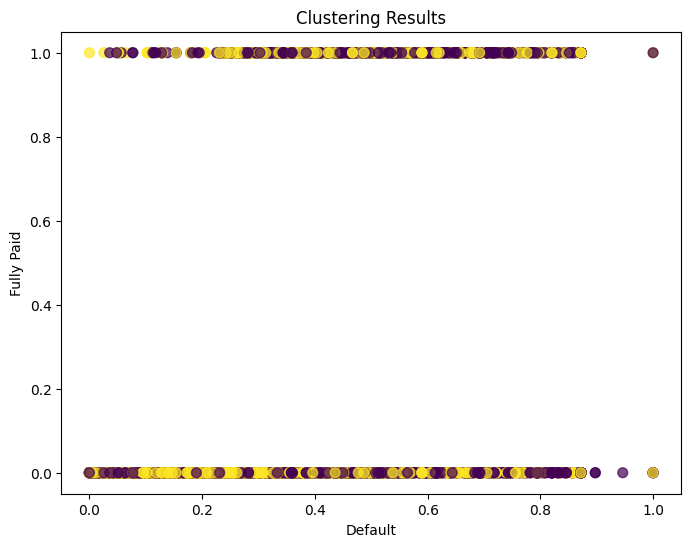

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Clustering Results')
plt.xlabel('Default')
plt.ylabel('Fully Paid')